In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
def CNN_Onehot(X_train, Y_train):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=X_train.shape[1:4]))    
    model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(Y_train.shape[1], activation="softmax"))
        
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def preprocess_mnist_data(X_train, Y_train, X_test, Y_test):
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
    X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")
    X_train /= 255
    X_test /= 255
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    return (X_train, Y_train), (X_test, Y_test)

def train_model(model, epochs, batch_size):
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2)
    return history

def visual_train_status(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    epochs = range(1, len(loss)+1)
    
    plt.figure(figsize=(12,3))
    plt.subplot(121)
    plt.plot(epochs, loss, "bo-", label="Training Loss")
    plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()    
    plt.subplot(122)
    plt.plot(epochs, acc, "bo-", label="Training Acc")
    plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
(X_train, Y_train), (X_test, Y_test) = preprocess_mnist_data(X_train, Y_train, X_test, Y_test)

model = CNN_Onehot(X_train, Y_train)
model.summary()

history = train_model(model, epochs=3, batch_size=128)

loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


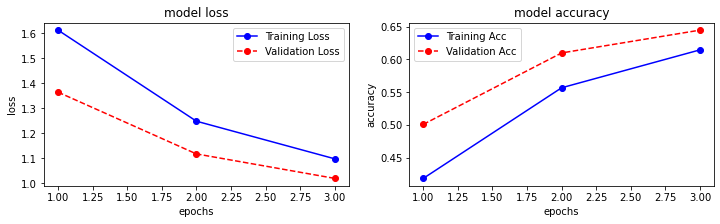

In [4]:
print(history.history.keys())
visual_train_status(history)